#EDA y análisis de sentimientos de opiniones sobre ChatGPT en Twitter

##Importar librerías

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
import plotly.express as px

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

##Cargar datos

In [23]:
data=pd.read_csv('ChatGPT.csv')

<ipython-input-23-cfc04e03a63f>:1: DtypeWarning:

Columns (0,6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.



In [24]:
data.head()

,Unnamed: 0,Date,Tweet,Url,User,UserCreated,UserVerified,UserFollowers,UserFriends,Retweets,Likes,Location,Description
0,0,2023-04-08 03:33:13+00:00,#ChatGPT If only there were a movie or somethi...,https://twitter.com/kirbydjohnson/status/16445...,kirbydjohnson,2012-07-29 22:57:46+00:00,False,50.0,76.0,0.0,0,NaN,NaN
1,1,2023-04-08 03:32:16+00:00,"Workshop Description: In this workshop, you wi...",https://twitter.com/UniversityWeb/status/16445...,UniversityWeb,2013-01-13 20:18:16+00:00,False,9056.0,387.0,0.0,0,NaN,"University webinars, speech videos, & news for..."
2,2,2023-04-08 03:32:05+00:00,New Post at AiNewsDrop!\n\nChatGPT is a doctor...,https://twitter.com/AiNewsDrop/status/16445436...,AiNewsDrop,2022-01-19 06:25:45+00:00,False,276.0,313.0,0.0,0,NaN,I'm up almost 24/7 hunting for AI News\n\nWith...
3,3,2023-04-08 03:31:08+00:00,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,https://twitter.com/tubeblogger/status/1644543...,tubeblogger,2013-06-25 01:42:59+00:00,False,312.0,293.0,0.0,0,The Internet,"Exploring the Best Of The Web. Tech, Games, Ar..."
4,4,2023-04-08 03:30:51+00:00,"""Classical art"" is struggling - not changed th...",https://twitter.com/majorradic/status/16445432...,majorradic,2011-12-12 01:29:15+00:00,False,522.0,684.0,0.0,2,Beograd Navodni,Mediji i milosrdje\n\n ...


In [25]:
data.shape

(478347, 13)

In [26]:
#len(data[data['UserVerified'] == True])
data['UserVerified'].value_counts()

False    441467
False     19112
True      17175
True        483
198          23
131           3
988           1
777           1
313           1
Name: UserVerified, dtype: int64

In [27]:
data=data[['Date','Tweet','UserVerified','Retweets','Likes']]
tweets=data[['Tweet']]
data

,Date,Tweet,UserVerified,Retweets,Likes
0,2023-04-08 03:33:13+00:00,#ChatGPT If only there were a movie or somethi...,False,0.0,0
1,2023-04-08 03:32:16+00:00,"Workshop Description: In this workshop, you wi...",False,0.0,0
2,2023-04-08 03:32:05+00:00,New Post at AiNewsDrop!\n\nChatGPT is a doctor...,False,0.0,0
3,2023-04-08 03:31:08+00:00,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,False,0.0,0
4,2023-04-08 03:30:51+00:00,"""Classical art"" is struggling - not changed th...",False,0.0,2
...,...,...,...,...,...
478342,2022-11-30 18:33:33+00:00,@OpenAI 's new #ChatGPT is insane\nPrompt: An ...,False,0,3
478343,2022-11-30 18:31:23+00:00,ChatGPT first look - https://t.co/16K2NlmOoY. ...,False,2,3
478344,2022-11-30 18:26:58+00:00,OK so @OpenAI's new #ChatGPT can basically jus...,False,4002,23176
478345,2022-11-30 18:22:04+00:00,Just in! \n#ChatGPT - research early stage GPT...,False,1,1


#Limpieza de tweets

In [28]:
# Descargar los datos necesarios de NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Convertir el texto a minúsculas
tweets['Tweet'] = tweets['Tweet'].str.lower()
tweets['Tweet'] =tweets['Tweet'].apply(str)

# Eliminar signos de puntuación, números y caracteres especiales
tweets['Tweet'] = tweets['Tweet'].apply(lambda x: re.sub('[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]', ' ', x))

# Separar el texto en palabras individuales
tweets['palabras'] = tweets['Tweet'].apply(lambda x: x.split())

# Eliminar las palabras de parada (stopwords)
stop_words = set(stopwords.words('spanish'))
tweets['palabras'] = tweets['palabras'].apply(lambda x: [palabra for palabra in x if palabra not in stop_words])

# Lematizar las palabras
lemmatizer = WordNetLemmatizer()
tweets['palabras'] = tweets['palabras'].apply(lambda x: [lemmatizer.lemmatize(palabra) for palabra in x])

# Unir las palabras limpias en una cadena de texto nuevamente
tweets['Tweet_limpio'] = tweets['palabras'].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-28-dc3d463149de>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-dc3d463149de>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-dc3d463149de>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from 

In [29]:
tweets['Tweet_limpio']

0         chatgpt if only there were movie or something ...
1         workshop description in this workshop you will...
2         new post at ainewsdrop chatgpt is doctor now s...
3         openai s gpt just got supercharged ai chatgpt ...
4         classical art is struggling not changed the fa...
                                ...                        
478342    openai s new chatgpt is insane prompt an artic...
478343    chatgpt first look http t co k nlmooy this thi...
478344    ok so openai s new chatgpt can basically just ...
478345    just in chatgpt research early stage gpt optim...
478346    ai model are set to become the search engine o...
Name: Tweet_limpio, Length: 478347, dtype: object

#Analisis de sentimiento

In [30]:
nltk.download('stopwords')
from textblob import TextBlob
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
#create function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#apply function to data
tweets['Subjectivity'] = tweets['Tweet_limpio'].apply(getSubjectivity)
tweets['Polarity'] = tweets['Tweet_limpio'].apply(getPolarity)
tweets.head()

<ipython-input-31-322a91d7126f>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Tweet,palabras,Tweet_limpio,Subjectivity,Polarity
0,chatgpt if only there were a movie or somethi...,"[chatgpt, if, only, there, were, movie, or, so...",chatgpt if only there were movie or something ...,1.000000,0.000000
1,workshop description in this workshop you wi...,"[workshop, description, in, this, workshop, yo...",workshop description in this workshop you will...,0.700000,0.466667
2,new post at ainewsdrop chatgpt is a doctor n...,"[new, post, at, ainewsdrop, chatgpt, is, docto...",new post at ainewsdrop chatgpt is doctor now s...,0.727273,-0.231818
3,openai s gpt just got supercharged ai cha...,"[openai, s, gpt, just, got, supercharged, ai, ...",openai s gpt just got supercharged ai chatgpt ...,0.000000,0.000000
4,classical art is struggling not changed th...,"[classical, art, is, struggling, not, changed,...",classical art is struggling not changed the fa...,0.500000,0.200000


In [32]:
def getSentiment(score):
    if score < 0:
        return 'Negativo'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positivo'

#apply function to data
tweets['Sentiment'] = tweets['Polarity'].apply(getSentiment)
tweets.head()

,Tweet,palabras,Tweet_limpio,Subjectivity,Polarity,Sentiment
0,chatgpt if only there were a movie or somethi...,"[chatgpt, if, only, there, were, movie, or, so...",chatgpt if only there were movie or something ...,1.000000,0.000000,Neutral
1,workshop description in this workshop you wi...,"[workshop, description, in, this, workshop, yo...",workshop description in this workshop you will...,0.700000,0.466667,Positivo
2,new post at ainewsdrop chatgpt is a doctor n...,"[new, post, at, ainewsdrop, chatgpt, is, docto...",new post at ainewsdrop chatgpt is doctor now s...,0.727273,-0.231818,Negativo
3,openai s gpt just got supercharged ai cha...,"[openai, s, gpt, just, got, supercharged, ai, ...",openai s gpt just got supercharged ai chatgpt ...,0.000000,0.000000,Neutral
4,classical art is struggling not changed th...,"[classical, art, is, struggling, not, changed,...",classical art is struggling not changed the fa...,0.500000,0.200000,Positivo


##Nube de palabras

Comentarios positivos

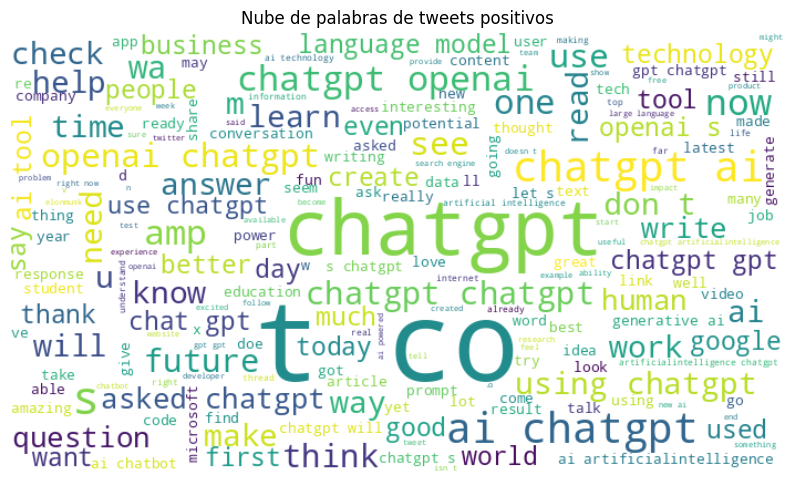

In [33]:
Positivo = " ".join(tweets[tweets.Sentiment == 'Positivo']['Tweet_limpio'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(Positivo)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Nube de palabras de tweets positivos")
plt.axis('off')
plt.show()

Comentarios negativos

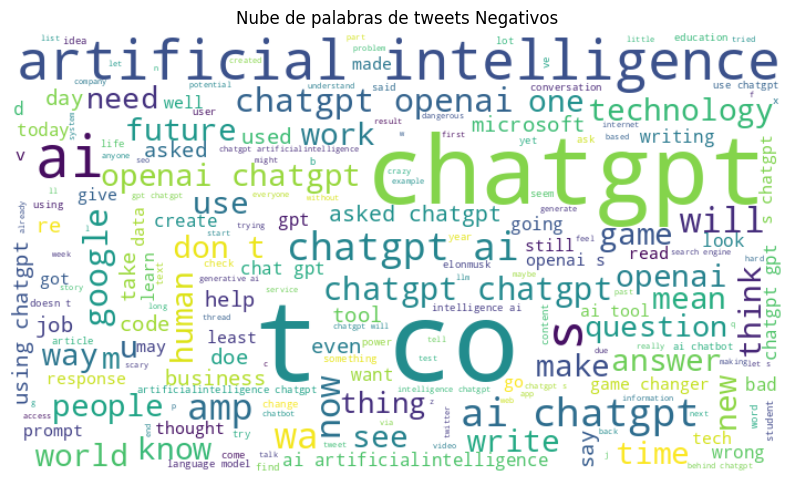

In [34]:
Negativo = " ".join(tweets[tweets.Sentiment == 'Negativo']['Tweet_limpio'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(Negativo)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Nube de palabras de tweets Negativos")
plt.axis('off')
plt.show()

Comentarios Neutrales

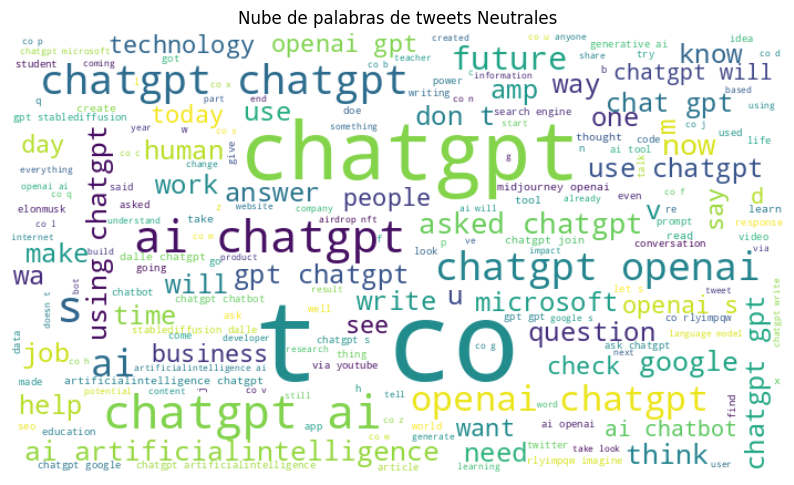

In [35]:
Neutral = " ".join(tweets[tweets.Sentiment == 'Neutral']['Tweet_limpio'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, background_color = 'white').generate(Neutral)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Nube de palabras de tweets Neutrales")
plt.axis('off')
plt.show()

##Visualizar

In [39]:
# Calcular el conteo de cada sentimiento
sentiment_counts = tweets['Sentiment'].value_counts()
sentiment_counts

Positivo    249698
Neutral     156473
Negativo     72176
Name: Sentiment, dtype: int64

In [40]:
# Crear un DataFrame con el conteo de sentimientos
sentiment_df = pd.DataFrame({'Sentimiento': sentiment_counts.index, 'Cantidad de tweets': sentiment_counts.values})

# Crear la gráfica de barras utilizando Plotly
fig = px.bar(sentiment_df, x='Sentimiento', y='Cantidad de tweets',
             title='Análisis de sentimiento sobre el uso de ChatGPT',
             labels={'Sentimiento': 'Sentimiento', 'Cantidad de tweets': 'Cantidad de tweets'}, text_auto = True)
fig.update_traces(textfont_size = 14, textangle = 0, textposition = "outside")
# Muestra la gráfica
fig.show()
